# Hand-Written Digit Classification with Neural Networks

In [1]:
import math
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

## Task 1: linear layer 
Implements the forward and backward functions for a linear layer.

In [2]:
class LinearLayer:
    def __init__(self, _m, _n):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.b = np.zeros((_n,)) # Initialize bias term
        self.stored_X = None
        self.W_grad = None #record the gradient of the weight
        self.b_grad = None #record the gradient of the bias

    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        '''
        
                self.stored_X = X
        # Added bias term for EC
        return X @ self.W + self.b
    
           
    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        # Added bias term for EC
        self.W_grad = self.stored_X.T @ Y_grad
        X_grad = Y_grad @ self.W.T
        self.b_grad = np.sum(Y_grad, axis = 0)
        return X_grad
        
        

## Checkpoint 1
Check your linear forward and backward function implementations with numerical derivatives.


In [3]:
#gradient check
import copy
#Random test
n = 3
m = 6
Y_grad = np.random.rand(1, m)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = LinearLayer(n, m)

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[-0.77493233  0.12924653  0.32473982]]
Numerical gradient: [[-0.77493233  0.12924653  0.32473982]]
Error:  9.86535020341961e-11
Correct backward. Congratulations!


## Task 2: non-linear activation
Implement the forward and backward functions for a nonlinear layer.

In [4]:
class ReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix A for Backward

    def forward(self, X):
        '''
        /*
         *  The input X matrix has the dimension [#samples, #features].
         *  The output Y matrix has the same dimension as the input X.
         *  Perform ReLU on each element of the input matrix to calculate the output matrix.
         *  Create an output matrix by going through each element in input and calculate relu=max(0,x) and
         *  Store the input X in self.stored_X for Backward.
         */
        '''
        
        

        self.stored_X = X
        return np.maximum(0, X)


      
    def backward(self, Y_grad):
        '''
         /*  grad_relu(x)=1 if relu(x)=x
         *  grad_relu(x)=0 if relu(x)=0
         *
         *  The input matrix has the name "output_grad." The name is confusing (it is actually the input of the function). But the name follows the convension in PyTorch.
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         *  Returns the output matrix calculated above
         */
        '''
        
        
        
        grad_relu = np.where(self.stored_X > 0, Y_grad, 0)
        return grad_relu
        
                

In [5]:
#Extra credit activation
class NewActivation:
    def forward(self, X):
        '''
        New activation function: f(x) = log(1 + exp(x))
        
        '''
        self.stored_X = X
        return np.log(1 + np.exp(X))
    
    def backward(self, Y_grad):
        '''
        Derivative of new activation function: f'(x) =  exp(x) / (1 + exp(x))
        
        '''
        return np.exp(self.stored_X) / (1 + np.exp(self.stored_X)) * Y_grad

## Checkpoint 2 
Check your ReLU forward and backward functions

In [6]:
#gradient check
import copy
#Random test
n = 3
Y_grad = np.random.rand(1, n)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = ReLU()

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backward. Please check your implementation again.')

Your gradient:  [[0.65269073 0.32298109 0.68910921]]
Numerical gradient: [[0.65269073 0.32298109 0.68910921]]
Error:  8.49725845242233e-12
Correct backward. Congratulations!


## Task 3: Loss function
Implement the MSE loss function and its backward derivative. 

In [7]:
class MSELoss:
    # MSE loss
    # return the mse loss mean(y_j-y_pred_i)^2
    
    def __init__(self):
        self.stored_diff = None
    def forward(self, prediction, groundtruth):
        '''
        /*  Calculate stored_diff as  prediction-groundtruth
         *  Calculate the MSE loss as the squared sum of all the elements in the stored_diff divided by the number of elements, i.e., MSE(pred, truth) = ||pred-truth||^2 / N, with N as the total number of elements in the matrix
         */
        '''
        
                self.stored_diff = prediction - groundtruth
        mse_loss = np.sum(self.stored_diff**2) / self.stored_diff.size
        return mse_loss
        
        
        
    # return the gradient of the input data
    def backward(self):
        '''
        /* Return the gradient matrix of the MSE loss
         * The output matrix has the same dimension as the stored_diff (make sure you have stored the (pred-truth) in stored_diff in your forward function!)
         * Each element (i,j) of the output matrix is calculated as grad(i,j)=2(pred(i,j)-truth(i,j))/N  (this is the first derivate of the MSE loss)
         */
        '''
        
             grad_matrix = 2 * self.stored_diff / self.stored_diff.size
        return grad_matrix
        
             

## Task 4: Network architecture
Implement your own neural network architecture.

In [8]:
class Network:
    def __init__(self, layers_arch):
        '''
        /* Initialize the array for input layers with the proper feature sizes specified in the input vector.
         * For the linear layer, in each pair (in_size, out_size), the in_size is the feature size of the previous layer and the out_size is the feature size of the output (that goes to the next layer)
         * In the linear layer, the weight should have the shape (in_size, out_size).
         
         *  For example, if layers_arch = [['Linear', (256, 128)], ['ReLU'], ['Linear', (128, 64)], ['ReLU'], ['Linear', (64, 32)]],
       * 							 then there are three linear layers whose weights are with shapes (256, 128), (128, 64), (64, 32),
       * 							 and there are two non-linear layers.
         *  Attention: * The output feature size of the linear layer i should always equal to the input feature size of the linear layer i+1.
       */
        '''
       
               self.layers = []
        for arch in layers_arch:
            if arch[0] == 'Linear':
                self.layers.append(LinearLayer(arch[1][0], arch[1][1]))
            elif arch[0] == 'ReLU':
                self.layers.append(ReLU())
            elif arch[0] == 'New':
                self.layers.append(NewActivation())
                
    def forward(self, X):
        '''
        /*
         * Propagate the input data for the first linear layer throught all the layers in the network and return the output of the last linear layer.
         * For implementation, you need to write a for-loop to propagate the input from the first layer to the last layer (before the loss function) by going through the forward functions of all the layers.
         * For example, for a network with k linear layers and k-1 activation layers, the data flow is:
         * linear[0] -> activation[0] -> linear[1] ->activation[1] -> ... -> linear[k-2] -> activation[k-2] -> linear[k-1]
         */
        '''
        
               newX = X
        for l in self.layers:
            newX = l.forward(newX)
        return newX
       
    def backward(self, Y_grad):
        '''
        /* Propagate the gradient from the last layer to the first layer by going through the backward functions of all the layers.
         * Propagate the gradient of the output (we got from the Forward method) back throught the network and return the gradient of the first layer.

         * Notice: We should use the chain rule for the backward.
         * Notice: The order is opposite to the forward.
         */
        '''
        
                newY_grad = Y_grad
        for l in reversed(self.layers):
            newY_grad = l.backward(newY_grad)
        return newY_grad
        
       

## Checkpoint 3: Simple regression 
Check your network implementation with a simple regression task. 

In [9]:
class Regressor:
    #Classifier
    def __init__(self, layers_arch, data_function, learning_rate = 1e-3, batch_size = 32, max_epoch = 200):

        input_feature_size = 2
        output_feature_size = 2

        self.train_data = []
        self.train_label = []
        self.test_data = []
        self.test_label = []

        self.data_function = data_function
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def dataloader(self):
        
        '''
        We randomly generate the mapping: (x)->(x^3+x^2 + 1)
        '''
        self.train_data = np.zeros((1000,1))
        self.train_label = np.zeros((1000, 1))

        for i in range(1000):
            self.train_data[i][0] = np.random.uniform(low=0.0, high=10000.0)/10000.0
            self.train_label[i][0] = self.data_function(self.train_data[i][0])

        self.test_data = np.zeros((200, 1))
        self.test_label = np.zeros((200, 1))

        for i in range(200):
            self.test_data[i][0] = np.random.uniform(low=-0.0, high=10000.0) / 10000.0
            self.test_label[i][0] = self.data_function(self.test_data[i][0])



    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data)/self.batch_size))

        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size : (i+1)*self.batch_size]
            batch_label = self.train_label[i * self.batch_size : (i+1)*self.batch_size]
            
            '''
            /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
                        prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
                        
        return loss/n_loop

    def Test(self):
        prediction = self.net.forward(self.test_data)
        loss = self.loss_function.forward(prediction, self.test_label)
        return loss

    def Train(self):
        self.dataloader()
        train_loss_history=[]
        test_loss_history=[]
        for i in range(self.max_epoch):
            train_loss = self.Train_One_Epoch()
            test_loss = self.Test()
            train_loss_history.append(train_loss)
            test_loss_history.append(test_loss)
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", train_loss, " | Test loss : ", test_loss)
        fig, ax = plt.subplots()
        ax.plot(train_loss_history,color='blue',label='Train')
        ax.plot(test_loss_history,color='red',label='Test')
        ax.legend()


Epoch:  1 / 100  | Train loss:  3.344224307146897  | Test loss :  3.152241384360101
Epoch:  2 / 100  | Train loss:  2.9570492934128616  | Test loss :  2.7872356207466744
Epoch:  3 / 100  | Train loss:  2.6167086956923655  | Test loss :  2.465869728125373
Epoch:  4 / 100  | Train loss:  2.3168021905674876  | Test loss :  2.182344970550878
Epoch:  5 / 100  | Train loss:  2.052074674275235  | Test loss :  1.9318635115933684
Epoch:  6 / 100  | Train loss:  1.8187780865940761  | Test loss :  1.712097633986208
Epoch:  7 / 100  | Train loss:  1.6139040985185245  | Test loss :  1.5180065792304487
Epoch:  8 / 100  | Train loss:  1.43256923039689  | Test loss :  1.346113463212918
Epoch:  9 / 100  | Train loss:  1.27204827904646  | Test loss :  1.1939578695378847
Epoch:  10 / 100  | Train loss:  1.1300388331324325  | Test loss :  1.0593722959762706
Epoch:  11 / 100  | Train loss:  1.0045142923995547  | Test loss :  0.9404301282416105
Epoch:  12 / 100  | Train loss:  0.8936778427938545  | Test los

0.10710798671481941

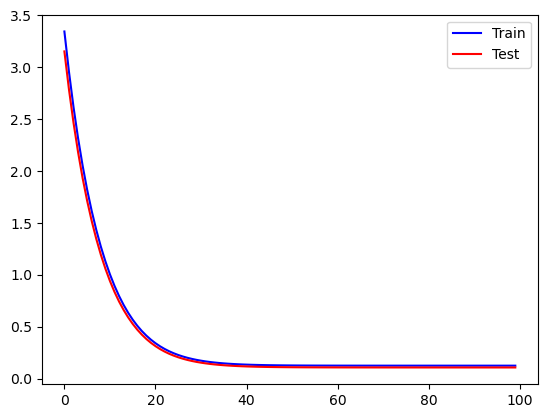

In [10]:
# regressor
# regressor_layers_arch = [['ReLU'], ['Linear', (1, 16)], ['Linear', (16, 16)], ['ReLU'], ['ReLU'], ['Linear', (16, 1)], ['ReLU']]
regressor_layers_arch = [['Linear', (1, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 100)
regressor.Train()

regressor.Test()

Epoch:  1 / 100  | Train loss:  3.7880583174979656  | Test loss :  3.8067988400316612
Epoch:  2 / 100  | Train loss:  3.4431912290139857  | Test loss :  3.468539396015207
Epoch:  3 / 100  | Train loss:  3.1403180325406055  | Test loss :  3.163478052575891
Epoch:  4 / 100  | Train loss:  2.8664210282304396  | Test loss :  2.8867533967906174
Epoch:  5 / 100  | Train loss:  2.617425092892871  | Test loss :  2.6345633046626613
Epoch:  6 / 100  | Train loss:  2.390129482423738  | Test loss :  2.4039066829536835
Epoch:  7 / 100  | Train loss:  2.181996556451895  | Test loss :  2.192391752824576
Epoch:  8 / 100  | Train loss:  1.9909938456349623  | Test loss :  1.9980916077912985
Epoch:  9 / 100  | Train loss:  1.8184132802792878  | Test loss :  1.8401268929497598
Epoch:  10 / 100  | Train loss:  1.6998355743320666  | Test loss :  1.7319334710827916
Epoch:  11 / 100  | Train loss:  1.5999937414088015  | Test loss :  1.6278854583526652
Epoch:  12 / 100  | Train loss:  1.5040286043049171  | Tes

0.1121395567928598

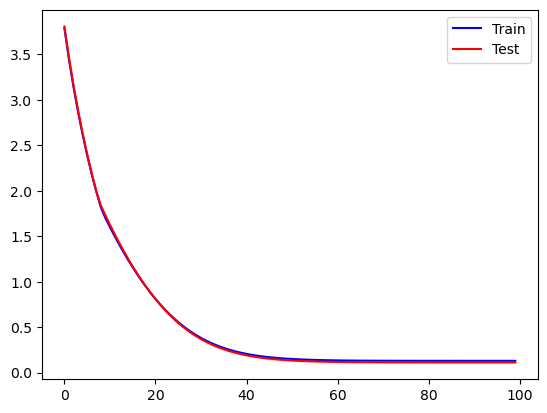

In [11]:
regressor_layers_arch_new = [['Linear', (1, 16)], ['New'], ['Linear', (16, 16)], ['New'], ['Linear', (16, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 100)
regressor.Train()

regressor.Test()

## Checkpoint 4:  Final Evaluation 

Check your network implementation with the digit recognition classification task. The code is provided for you. There is no coding required here.  ##PAY ATTENTION## Sections specify areas where we do something specific for classification.

In [12]:
### Do not change the code ###
def One_Hot_Encode(labels, classes = 10):
    '''
    /*  Make the labels one-hot.
     *  For example, if there are 5 classes {0, 1, 2, 3, 4} then
     *  [0, 2, 4] -> [[1, 0, 0, 0, 0],
     * 								[0, 0, 1, 0, 0],
     * 								[0, 0, 0, 0, 1]]
     */
    '''
    
    ########## PAY ATTENTION  ##########
    one_hot_label = np.zeros((len(labels), classes))
    for i in range(len(labels)):
        one_hot_label[i][labels[i]] = 1
    return one_hot_label
    ##########  \PAY ATTENTION  ##########

In [13]:
### Do not change the code ###
### visualize the samples 

def visualization(x, y_true, y_pred = None, rows = 2, cols = 5, split = 'train'):
    num_row = rows
    num_col = cols
    images = np.reshape(x, (-1, 28, 28))
    labels_true = y_true
    labels_pred = y_pred
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row * num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        if split == 'train':
            ax.set_title('Label: {}'.format(labels_true[i]))
        elif split == 'test':
            col = 'green'
            if labels_pred[i] != labels_true[i]:
                col = 'red'
            ax.set_title('Label: {} vs {}'.format(labels_true[i], labels_pred[i]), color = col)
            
    plt.tight_layout()
    plt.show()

In [14]:
class Classifier:
    #Classifier
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch, learning_rate = 1e-3, batch_size = 32, max_epoch = 200, classes = 10):
        self.classes = classes

        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path


        self.train_data = [] #The shape of train data should be (n_samples,28^2)
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate


    def dataloader(self):

        with open(self.train_data_path, "r") as f:
            for line in f:
                self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.train_data = np.array(self.train_data)

        with open(self.train_labels_path, "r") as f:
            for line in f:
                self.train_labels.append(int(line.strip()))
        self.train_labels = np.array(self.train_labels)

        with open(self.test_data_path, "r") as f:
            for line in f:
                self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.test_data = np.array(self.test_data)

        with open(self.test_labels_path, "r") as f:
            for line in f:
                self.test_labels.append(int(line.strip()))
        self.test_labels = np.array(self.test_labels)


    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data) / self.batch_size))
        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size: (i + 1) * self.batch_size]
            batch_label = self.train_labels[i * self.batch_size: (i + 1) * self.batch_size]
            batch_one_hot_label = One_Hot_Encode(batch_label, classes = self.classes)
            
            '''
             /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## PAY ATTENTION    ##########
            score = self.net.forward(batch_data)
            loss += self.loss_function.forward(score, batch_one_hot_label)

            score_grad = self.loss_function.backward()
            self.net.backward(score_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  PAY ATTENTION    ##########
        
        return loss / n_loop

    def Test(self):
        '''
        the class with max score is our predicted label
        '''
        score = self.net.forward(self.test_data)
        accuracy = 0
        for i in range(np.shape(score)[0]):
            one_label_list = score[i].tolist()
            label_pred = one_label_list.index(max(one_label_list))
            if label_pred == self.test_labels[i]:
                accuracy = accuracy +1

        accuracy = accuracy/np.shape(score)[0]
        return accuracy
    
    def visualize(self):
        score = self.net.forward(self.test_data)
        label_preds = np.argmax(score, axis=1)
        visualization(self.test_data, self.test_labels, label_preds, int(len(label_preds)/ 10), 10, split = 'test')
    
    def Train(self):
        self.dataloader()
        train_loss_history=[]
        test_accuracy_history=[]
        for i in range(self.max_epoch):
            loss = self.Train_One_Epoch()
            accuracy = self.Test()
            train_loss_history.append(loss)
            test_accuracy_history.append(accuracy)
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", loss, " | Test Accuracy : ", accuracy)
        fig, ax = plt.subplots()
        ax.plot(train_loss_history,color='blue',label='Train')
        ax.plot(test_accuracy_history,color='red',label='Test')
        ax.legend()


Now let's try our classifier network on MNIST!

Epoch:  1 / 200  | Train loss:  0.21413480078157213  | Test Accuracy :  0.225
Epoch:  2 / 200  | Train loss:  0.1364989271282579  | Test Accuracy :  0.27
Epoch:  3 / 200  | Train loss:  0.12272581768391497  | Test Accuracy :  0.305
Epoch:  4 / 200  | Train loss:  0.11316881484785025  | Test Accuracy :  0.38
Epoch:  5 / 200  | Train loss:  0.10568216590750659  | Test Accuracy :  0.39
Epoch:  6 / 200  | Train loss:  0.09963174602386268  | Test Accuracy :  0.415
Epoch:  7 / 200  | Train loss:  0.09462969877026285  | Test Accuracy :  0.435
Epoch:  8 / 200  | Train loss:  0.09041053789194538  | Test Accuracy :  0.455
Epoch:  9 / 200  | Train loss:  0.08679620606939618  | Test Accuracy :  0.495
Epoch:  10 / 200  | Train loss:  0.0836498139106709  | Test Accuracy :  0.52
Epoch:  11 / 200  | Train loss:  0.08088037227434003  | Test Accuracy :  0.54
Epoch:  12 / 200  | Train loss:  0.07841557828934237  | Test Accuracy :  0.57
Epoch:  13 / 200  | Train loss:  0.07620463330014918  | Test Accuracy

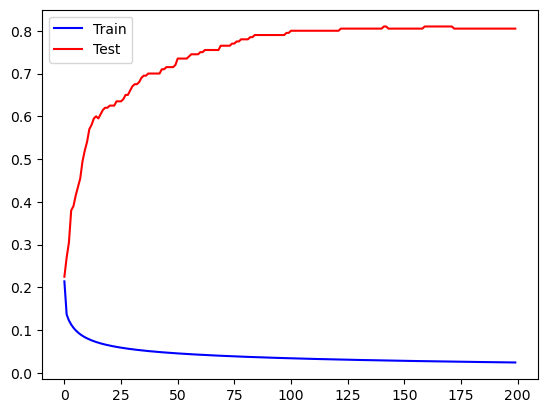

In [15]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
# classifier_layers_arch = [['Linear', (28*28, 256)], ['ReLU'], ['ReLU'], ['Linear', (256, 10)], ['ReLU']]
classifier_layers_arch = [['Linear', (28*28, 256)], ['ReLU'], ['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 32, max_epoch = 200)
cls.Train()


Epoch:  1 / 200  | Train loss:  0.21892603686696946  | Test Accuracy :  0.115
Epoch:  2 / 200  | Train loss:  0.14652025141860572  | Test Accuracy :  0.17
Epoch:  3 / 200  | Train loss:  0.129715169519885  | Test Accuracy :  0.22
Epoch:  4 / 200  | Train loss:  0.11786532872806225  | Test Accuracy :  0.295
Epoch:  5 / 200  | Train loss:  0.10901463565051009  | Test Accuracy :  0.33
Epoch:  6 / 200  | Train loss:  0.10214953757826926  | Test Accuracy :  0.385
Epoch:  7 / 200  | Train loss:  0.0966289813253257  | Test Accuracy :  0.445
Epoch:  8 / 200  | Train loss:  0.09208016894127562  | Test Accuracy :  0.48
Epoch:  9 / 200  | Train loss:  0.08824238321789048  | Test Accuracy :  0.495
Epoch:  10 / 200  | Train loss:  0.08494287322619738  | Test Accuracy :  0.515
Epoch:  11 / 200  | Train loss:  0.0820566354096302  | Test Accuracy :  0.535
Epoch:  12 / 200  | Train loss:  0.07950157005344996  | Test Accuracy :  0.56
Epoch:  13 / 200  | Train loss:  0.0772244253822932  | Test Accuracy :

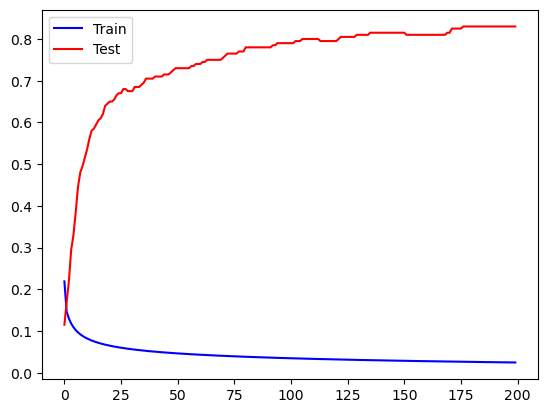

In [16]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


# new network architecture
new_architecture = [['Linear', (28*28, 256)], ['ReLU'], ['ReLU'], ['Linear', (256, 10)]]
cls_new = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = new_architecture, learning_rate = 0.01, batch_size = 32, max_epoch = 200)
cls_new.Train()

Epoch:  1 / 200  | Train loss:  0.1927822545668585  | Test Accuracy :  0.115
Epoch:  2 / 200  | Train loss:  0.1441781069352353  | Test Accuracy :  0.2
Epoch:  3 / 200  | Train loss:  0.126952014886621  | Test Accuracy :  0.24
Epoch:  4 / 200  | Train loss:  0.11499084756101831  | Test Accuracy :  0.31
Epoch:  5 / 200  | Train loss:  0.10627201745566914  | Test Accuracy :  0.36
Epoch:  6 / 200  | Train loss:  0.09964796866993074  | Test Accuracy :  0.4
Epoch:  7 / 200  | Train loss:  0.09440576239374043  | Test Accuracy :  0.44
Epoch:  8 / 200  | Train loss:  0.09013066270083367  | Test Accuracy :  0.47
Epoch:  9 / 200  | Train loss:  0.08654714341568663  | Test Accuracy :  0.495
Epoch:  10 / 200  | Train loss:  0.08347257707297186  | Test Accuracy :  0.505
Epoch:  11 / 200  | Train loss:  0.08079427899457063  | Test Accuracy :  0.51
Epoch:  12 / 200  | Train loss:  0.07842560701481584  | Test Accuracy :  0.52
Epoch:  13 / 200  | Train loss:  0.07629862842301782  | Test Accuracy :  0.5

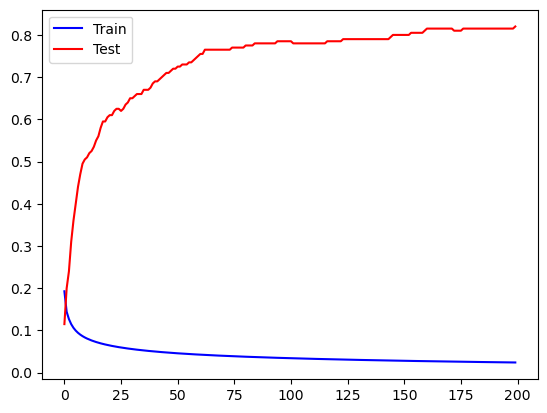

In [17]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'
# test new activation
new_activation = [['Linear', (28*28, 256)], ['New'], ['New'], ['Linear', (256, 10)]]
cls_newActivation = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = new_architecture, learning_rate = 0.01, batch_size = 32, max_epoch = 200)
cls_newActivation.Train()

In [18]:
cls.Test()

0.805

In [19]:
cls_new.Test()

0.83

In [20]:
cls_newActivation.Test()

0.82

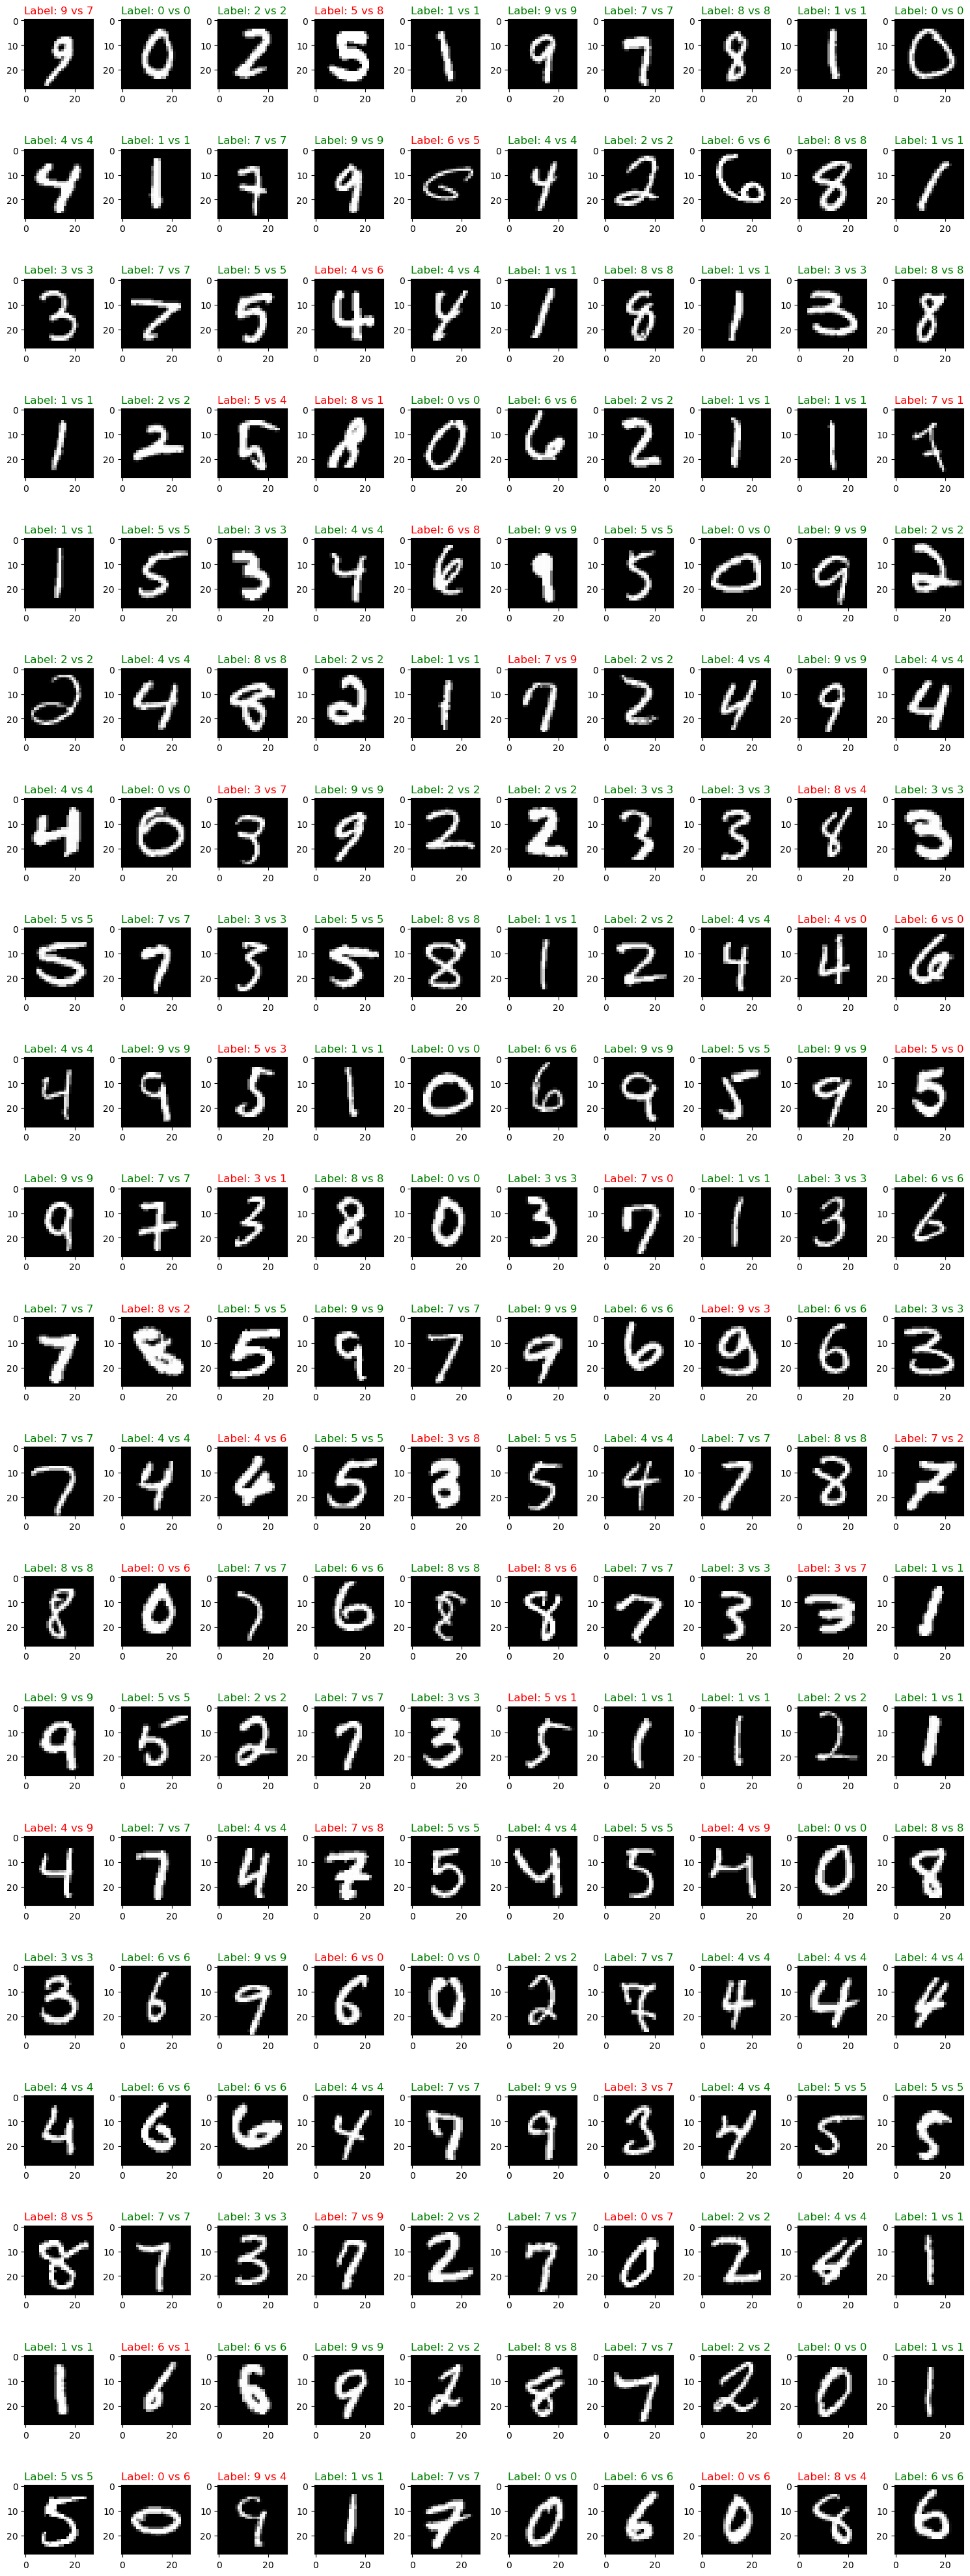

In [21]:
cls.visualize()

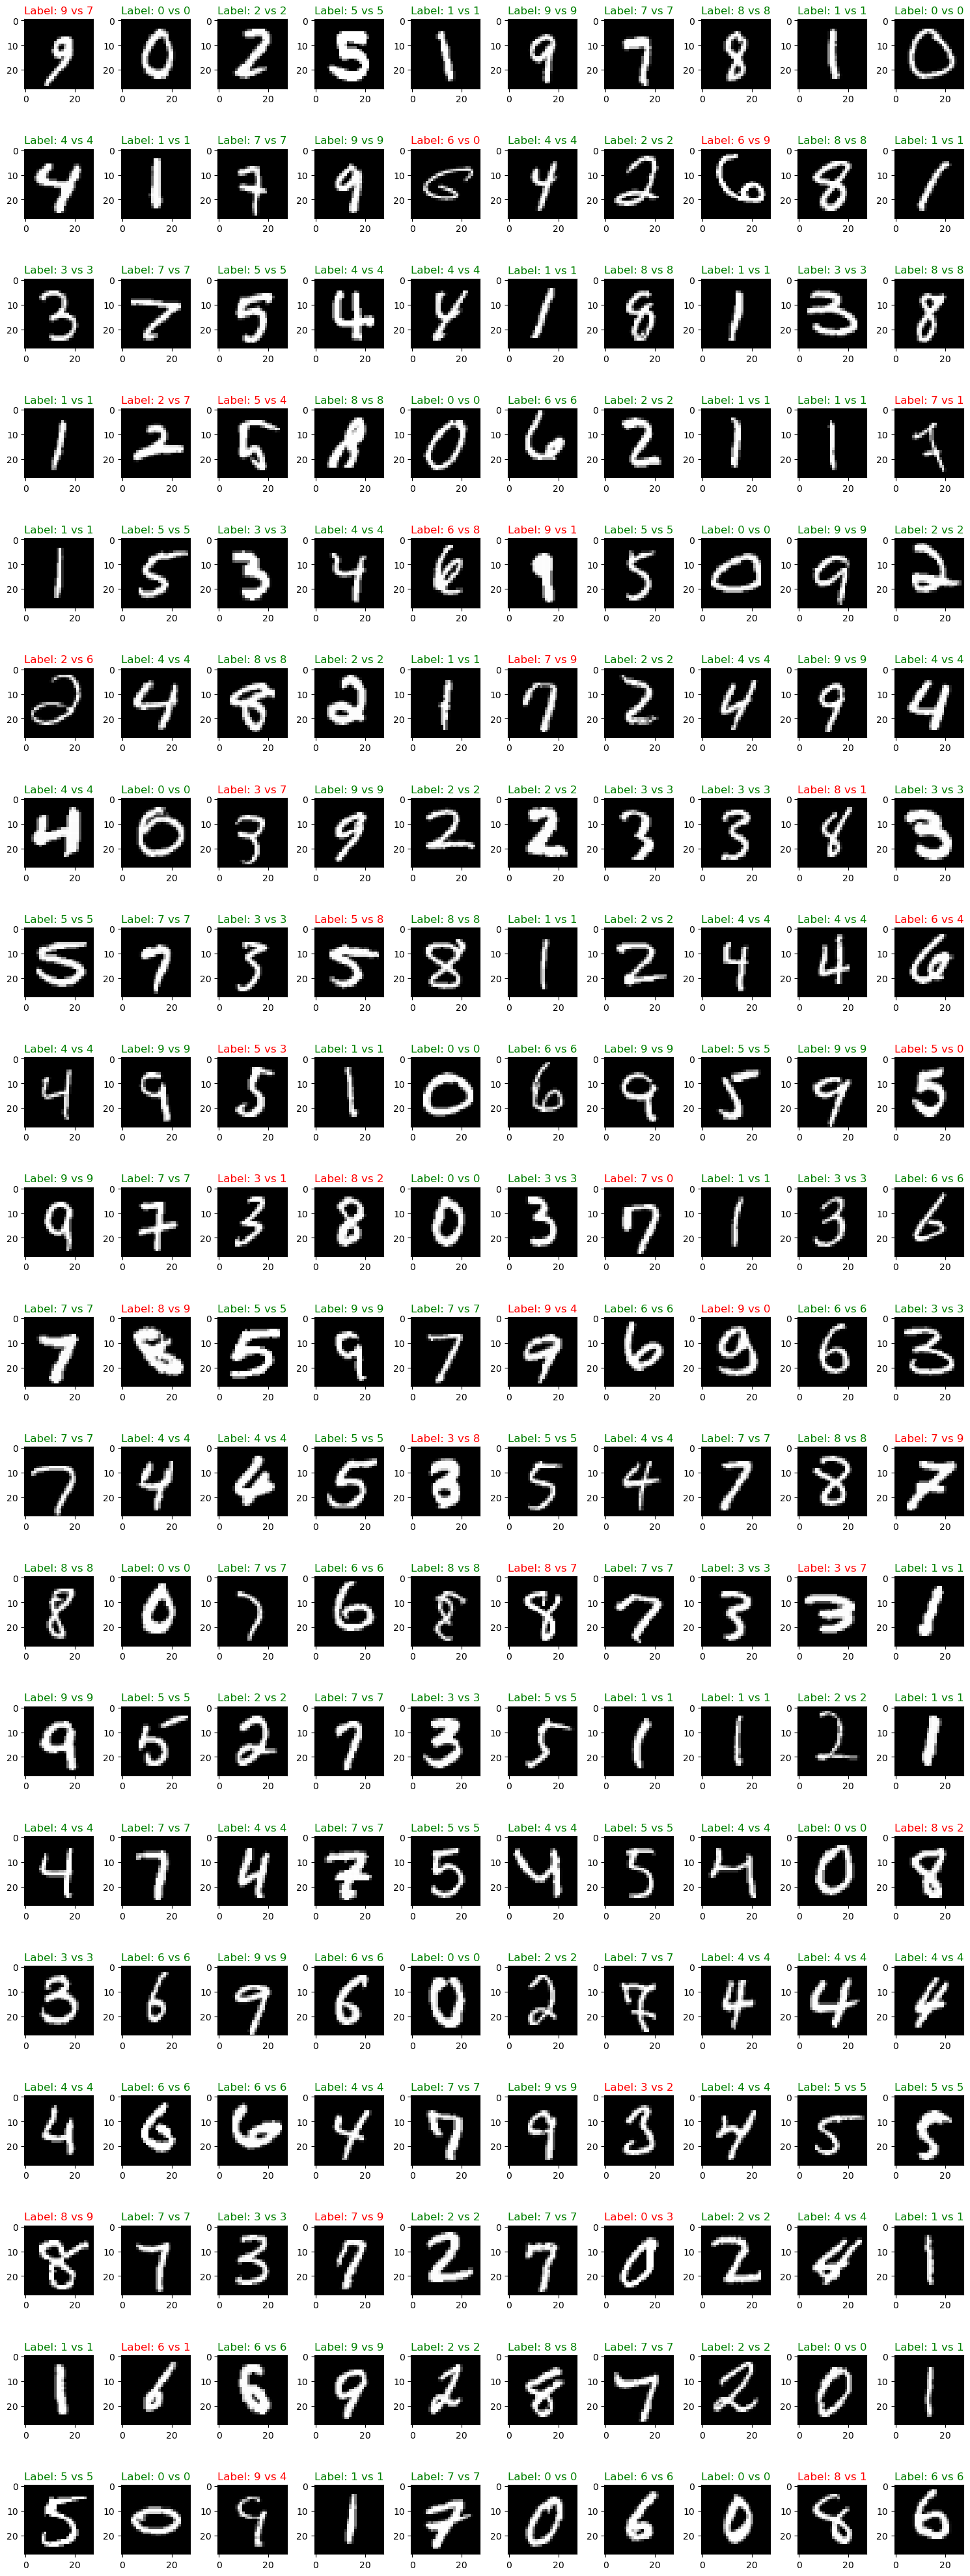

In [22]:
cls_new.visualize()

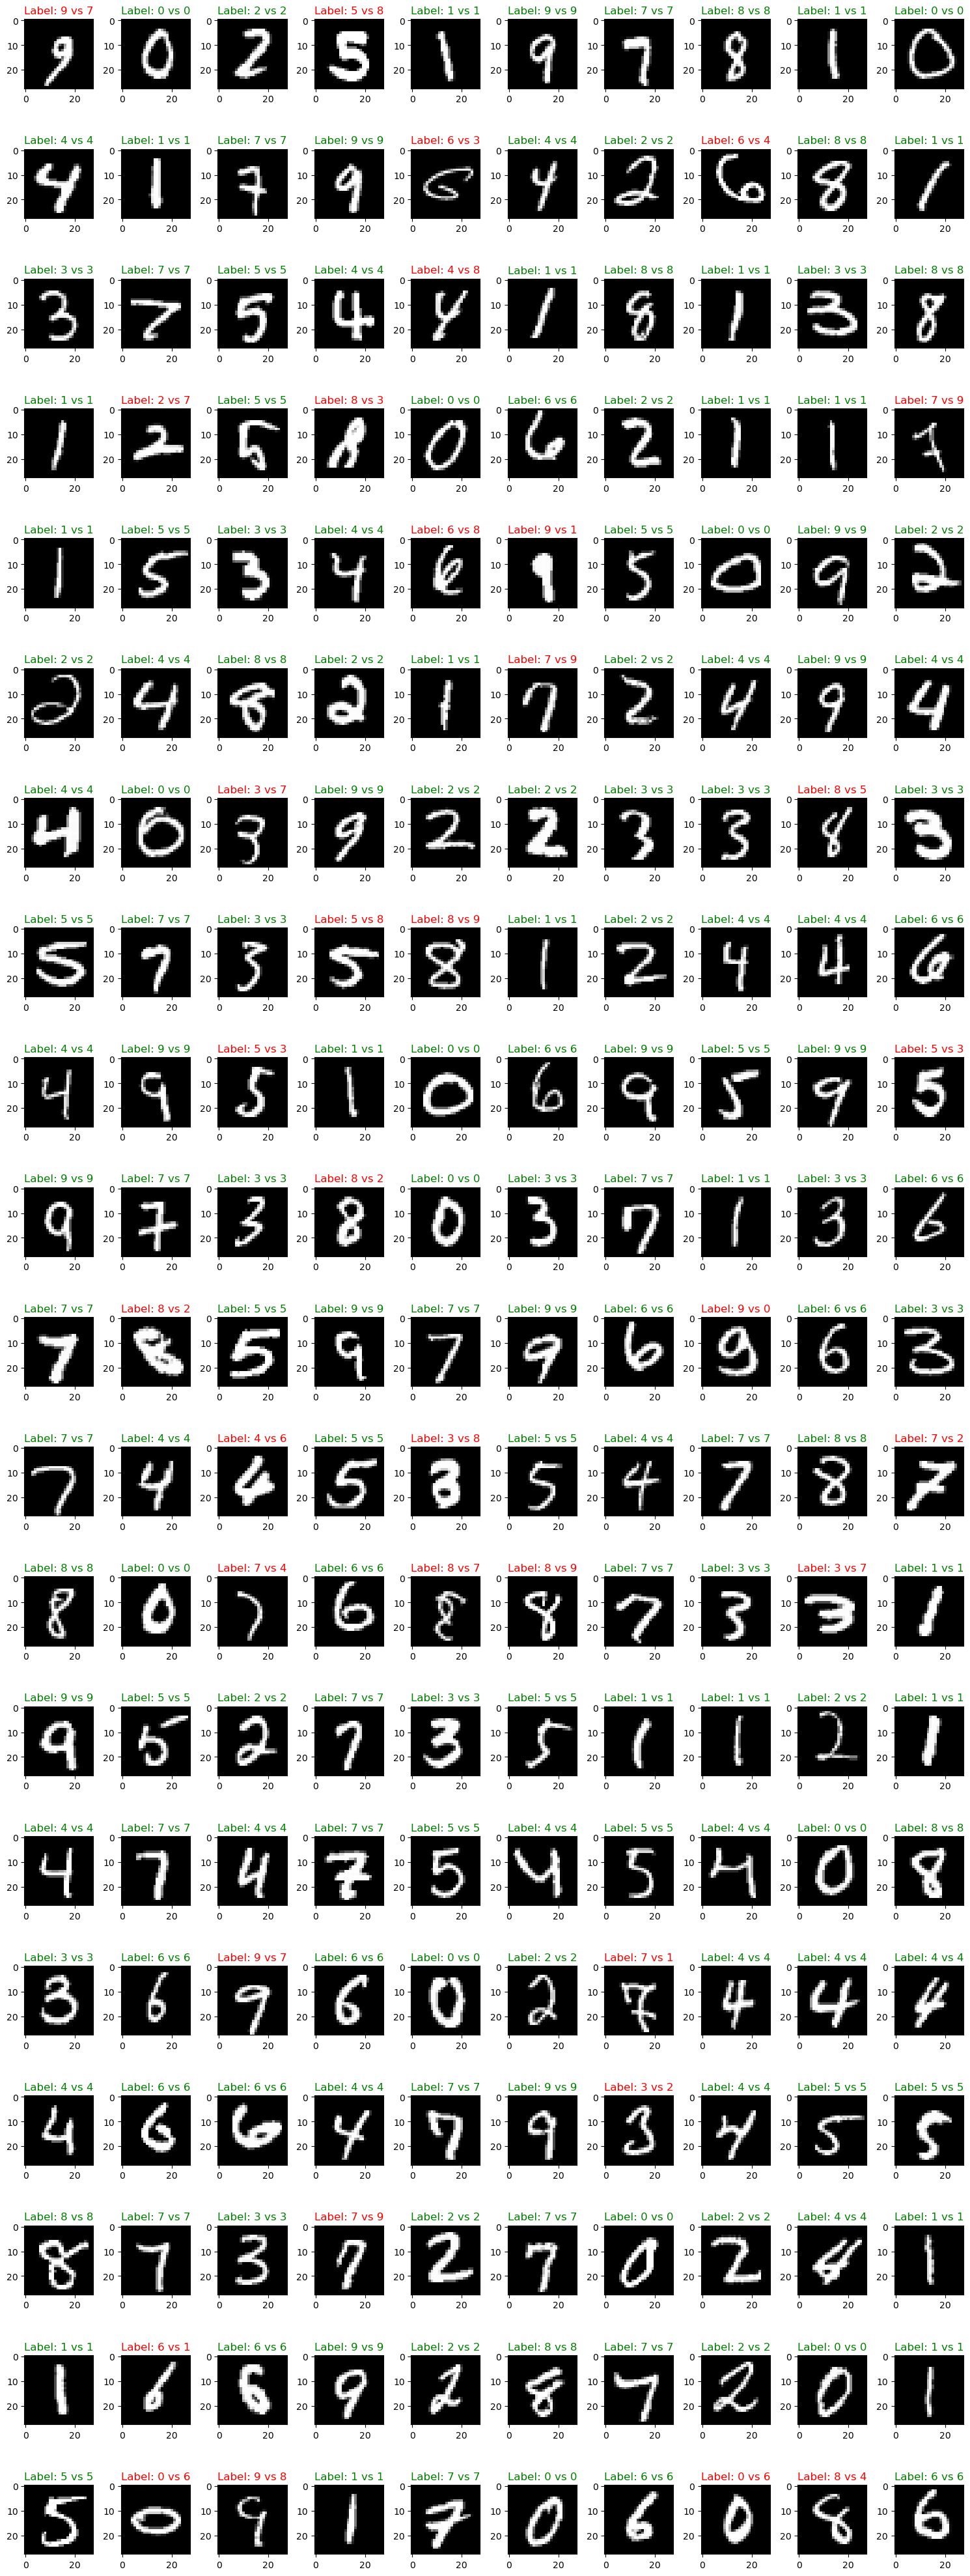

In [23]:
cls_newActivation.visualize()